In [3]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("ad_spend.csv")
df.head(3)

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214


In [7]:
df.shape

(200, 3)

In [4]:
df.isnull().sum()

Ad Spend ($)    0
Season          0
Revenue ($)     0
dtype: int64

# Visualization

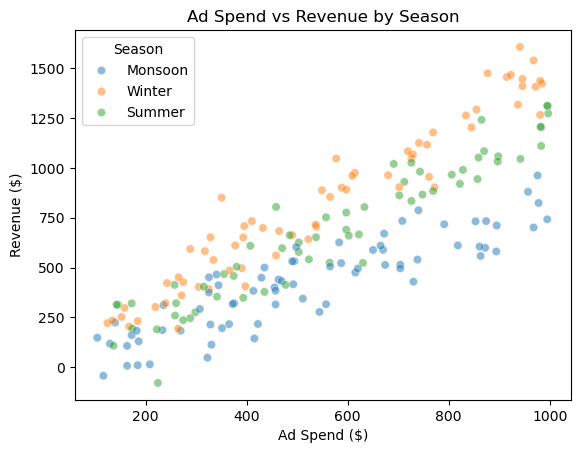

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming your DataFrame is df with columns 'ad_spend', 'revenue', 'season'

sns.scatterplot(df, x='Ad Spend ($)', y='Revenue ($)', hue='Season',alpha=0.5)
plt.title("Ad Spend vs Revenue by Season")
plt.show()

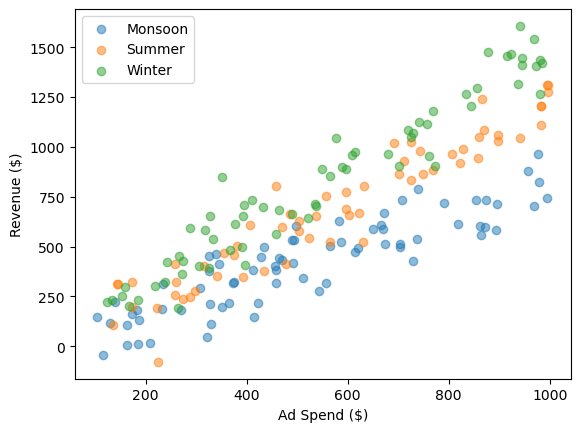

In [23]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"],subdf["Revenue ($)"],label=season,alpha=0.5)

plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

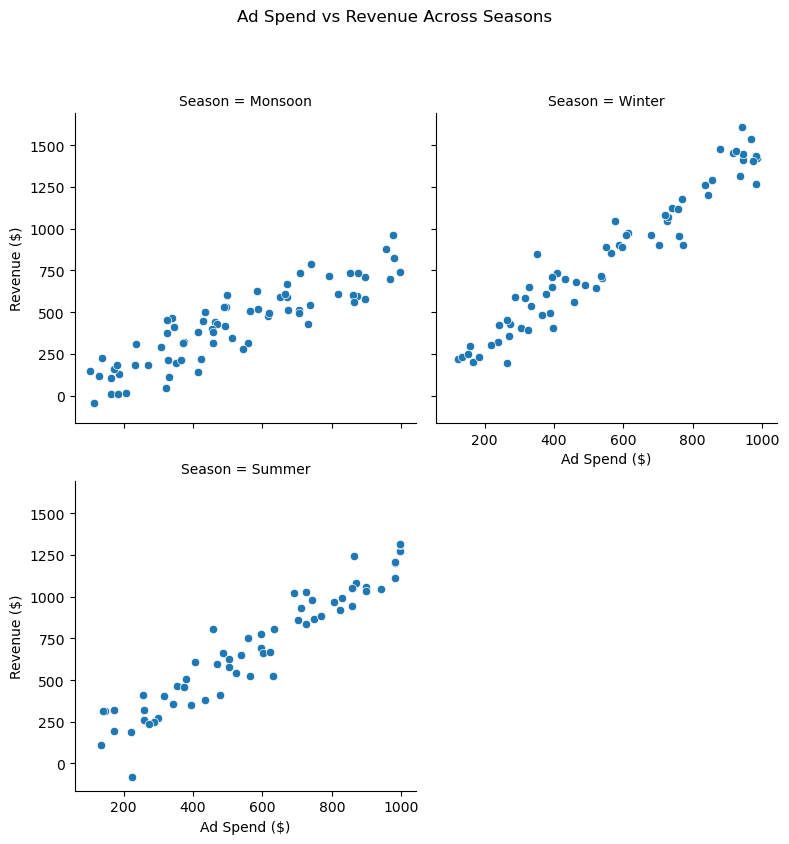

In [13]:
#  x='Ad Spend ($)', y='Revenue ($)', hue='Season'
sns.relplot(df, x='Ad Spend ($)', y='Revenue ($)', col='Season', kind='scatter',
    col_wrap=2,           # Wrap plots into multiple rows (optional) eg 2 per row
    height=4,             # Height of each subplot
    aspect=1              # Aspect ratio
)

plt.suptitle("Ad Spend vs Revenue Across Seasons", y=1.05)
plt.tight_layout()
plt.show()

In [17]:
g =df.groupby("Season")[["Ad Spend ($)","Revenue ($)"]].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


<Axes: xlabel='Season'>

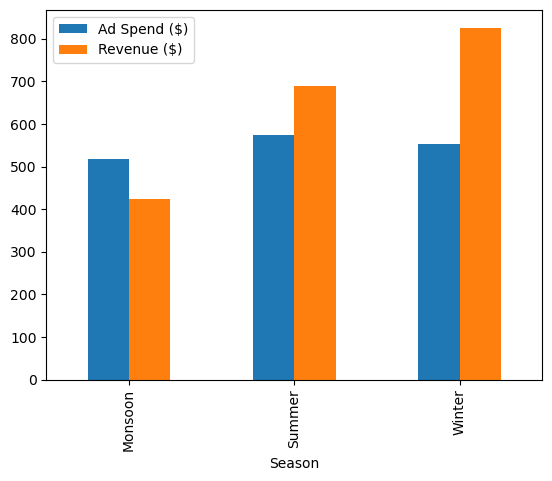

In [19]:
g.plot(kind="bar")

# One hot Encoding

In [27]:
df = pd.get_dummies(df,columns=["Season"],drop_first=True)
df.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True


In [29]:
from sklearn.model_selection import train_test_split

X = df.drop("Revenue ($)",axis =1 )
y =df["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Train Linear Regression Model

In [31]:

from sklearn.linear_model import LinearRegression

# Create the model instance
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

#y_pred = model.predict(X_test)

# If you use model.score(X_test, y_test),You don’t need to write y_pred separately,It internally predicts the values and calculates the R² score.
# Good for quick checks or one-liner evaluations.
# you use y_pred = model.predict(X_test) if you want to the value exclusively for next steps
# like Visualize actual vs predicted,Compute other metrics (like MAE, MSE, RMSE),Analyze errors/residuals

model.score(X_test,y_test)

0.888209700047729

# Train Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8972778553142061

# Train GDM (Gradient Boosting Model)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9149899654766234

In [48]:
y_pred = model.predict(X_test)

df_eval = pd.DataFrame({"Actual":y_test, "Predicted":y_pred}) 
df_eval.head()

,Actual,Predicted
59,605,677.144222
5,1125,1073.575312
20,699,626.698237
198,504,418.202801
52,1310,1134.088133


In [54]:
df_eval['Diff %'] = abs(df_eval["Predicted"] - df_eval["Actual"]) * 100/df_eval["Actual"]
df_eval.head()

,Actual,Predicted,Diff %
59,605,677.144222,11.924665
5,1125,1073.575312,4.571083
20,699,626.698237,10.343600
198,504,418.202801,17.023254
52,1310,1134.088133,13.428387
